In [1]:
push!(LOAD_PATH, ".")

4-element Array{String,1}:
 "@"      
 "@v#.#"  
 "@stdlib"
 "."      

In [2]:
using HDF5, FFTW
using FFTWtoolkit
using Plots
gr()
using LinearAlgebra

In [3]:
nome="../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1.h5"

"../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1.h5"

In [4]:
datos=h5open(nome)

HDF5 data file: ../JLDFiles/Deshinibida/180116s1/180116s1cut_evento_1.h5

In [5]:
names(datos)

7-element Array{String,1}:
 "CMPNeg"          
 "CMPos"           
 "CSDLindenberg"   
 "CanalesSaturados"
 "Canalesrespuesta"
 "LFPTotal"        
 "freq"            

In [6]:
lfp=read(datos["LFPTotal"]);

In [7]:
buenos=read(datos["Canalesrespuesta"]);
freq=read(datos["freq"])

7.022058198545425

In [8]:
y,x= collect(buenos[7,:])

2-element Array{Int64,1}:
 38
  6

In [9]:
exemplo=lfp[y,x,:];

In [12]:
plan=plan_fft(exemplo);

In [13]:
fexe=plan*exemplo;

In [14]:
nmax=size(lfp)[3]
rango=1:nmax
tmax=nmax/freq
rangotiempos=(rango.-1)./freq
rangofreqs=(rango.-1)./tmax
rfreqsim=map(x->-freq/2+(x-1)*freq/(nmax-1),rango);
rfreqsim[1001]

0.0

In [16]:
poder=map(abs2, fexe);

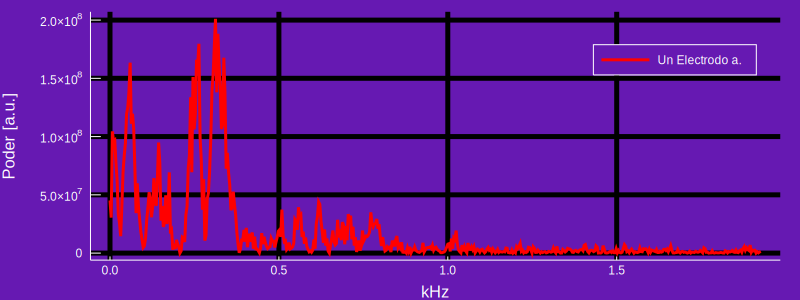

In [17]:
#figura=figure(figsize=(8,4))
#= ejemplo para aprender a usar Plots, veamos si si es más comodo que PyPlot
=#
#grid()
p=plot(rangofreqs[1:550], poder[1:550], 
    size=(800,300), xlabel= "kHz", ylabel="Poder [a.u.]", label="Un Electrodo a.",
    lw=3, c="red", background_color=RGB(0.4,0.1,0.7),
    grid=(:on, :black), gridlinewidth=5, gridalpha=1)


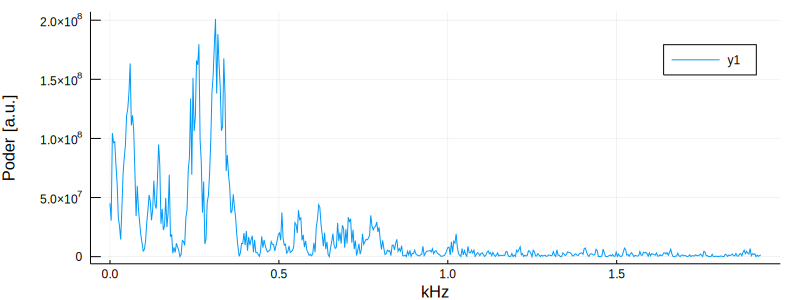

In [18]:
p=plot(size=(800,300), xlabel= "kHz", ylabel="Poder [a.u.]")
plot!(p,rangofreqs[1:550], poder[1:550])

In [20]:
ftotal=zeros(Complex, 64,64,nmax)
for j=1:64, k=1:64
    ftotal[j,k,:]=plan*lfp[j,k,:]
end

In [35]:
b=size(buenos)[1]
p=0
p=plot(size=(1000,900), xlabel= "kHz", ylabel="Poder [a.u.]")
rang=1:550
for el=1:5:b
    y,x= collect(buenos[el,:])
    ejemplo=map(abs2, ftotal[y,x,:])
    plot!(p, rangofreqs[rang], ejemplo[rang].+el*1e6,label="" , linecolor="black")
end
#display(p)

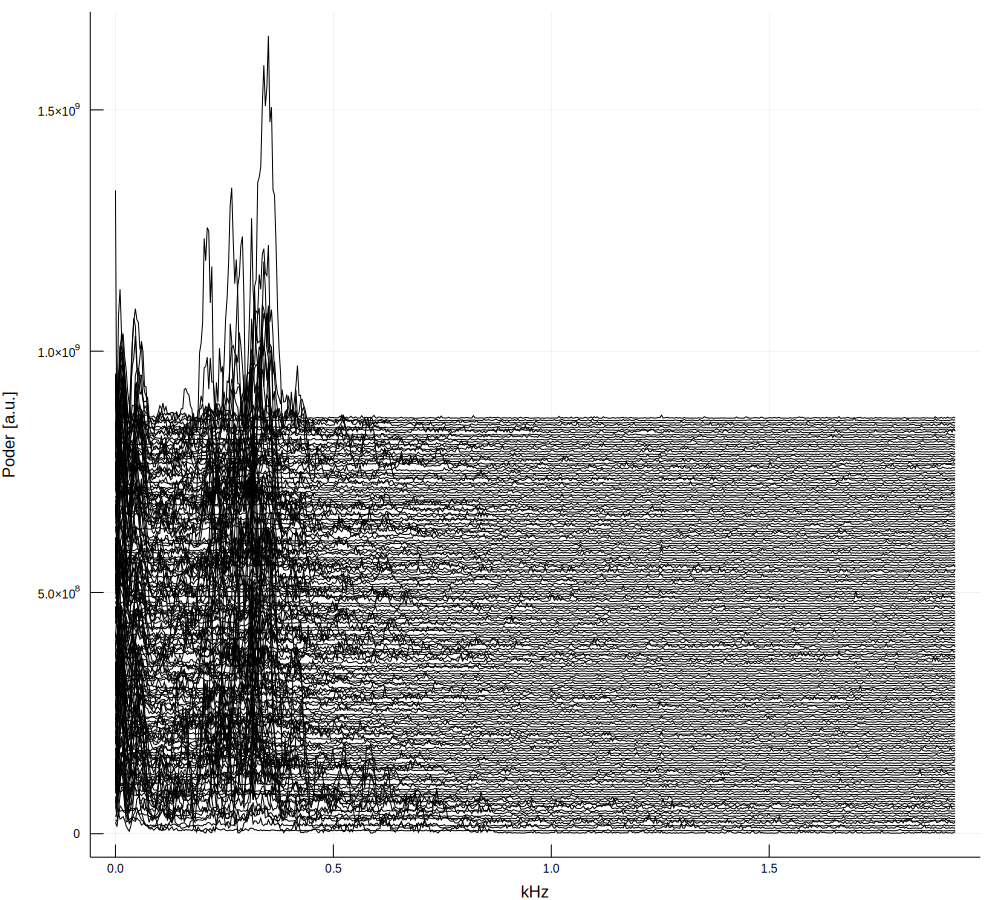

In [36]:
plot!(p, show=true)